<a href="https://colab.research.google.com/github/wordman2/GINN/blob/main/Abschnitt_9_Aufgaben.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GINN Teil 9

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## Multiple Choice

Welche der Aussagen ist wahr?



1.   Dropout führt zu Sparsity in den trainierten Modellgewichten
2.   Beim Testen auf Validierungsdaten wird Droput mit umgekehrter Wahrscheinlichkeit p angewendet
3. Je kleiner die Dropout-Wahrscheinlichkeit p, desto stärker der Regularisierungseffekt auf die Gewichte in den Layern
4. Aussagen 1-3 sind nicht wahr





## Numerische Stabilität

Untersuchen Sie, ab wann bei der Softmax Berechnung (ohne Korrektur) numerische Instabilität auftritt.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Funktion zur Berechnung der Softmax-Werte für eine Liste von Logits
def softmax(logits):
  exp_logits = np.exp(logits)
  return exp_logits / np.sum(exp_logits)

n = 1000
sums_of_p = []
for i in range(1,n):
  logits_range = np.linspace(-i, i, 1000)
  softmax_result = softmax(logits_range)
  sums_of_p.append(np.sum(softmax_result))

nan_values = np.isnan(sums_of_p)
first_nan_value = np.argmax(nan_values)
print("numerical instability at ", first_nan_value)

numerical instability at  709


<ipython-input-98-e2f66a975ef4>:7: RuntimeWarning: overflow encountered in exp
  exp_logits = np.exp(logits)
<ipython-input-98-e2f66a975ef4>:8: RuntimeWarning: invalid value encountered in divide
  return exp_logits / np.sum(exp_logits)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## Herausforderungen von SoftMax

Welche Herausforderungen sehen Sie, wenn Softmax zu Vorhersage eines Wortes (z.b. als Dokument-Summary oder next-word-prediction) aus einem großen Wörterbuch genutzt wird?


In [ ]:
# Wenn das Vocabulary groß ist, werden Logits sehr groß bzw. sehr klein, was wie oben gezeigt, zu numerischer Instabilität führen kann.

## Sigmoid = Softmax bei zwei Klassen

Zeigen Sie (erst generell mathematisch, dann noch mit einem Python-Beispiel), dass bei zwei Klassen die Sigmoidfunktion und die Softmaxfunktion identische Ergebnisse liefern, wenn der Logit-Wert für die zweite Klasse 0 ist





In [ ]:
# IHR BEWEIS HIER

In [ ]:
import numpy as np

###IHR CODE HIER
def sigmoid(x):
  return np.exp(x) / (1+np.exp(x))

# Beispielwerte
z = 2.0  # Ein Wert für die Sigmoid-Funktion
z_softmax = np.array([z, 0.0])  # Ein Vektor für die Softmax-Funktion

# Anwendung der Sigmoid-Funktion
sigmoid_result = sigmoid(z_softmax)

# Anwendung der Softmax-Funktion
softmax_result = softmax(z_softmax)

print(f"Sigmoid-Ergebnis: {sigmoid_result}")
print(f"Softmax-Ergebnis: {softmax_result}")



Sigmoid-Ergebnis: [0.88079708 0.5       ]
Softmax-Ergebnis: [0.88079708 0.11920292]


## Idempotenz

Zeige, dass die Softmax Funktion nicht generell idempotent ist. In welchem Fall ist sie das?

## Verteilungen erkennen

Bei welchen Verteilungen kam Softmax zur Anwendung? (mit kurzer Begründung!)

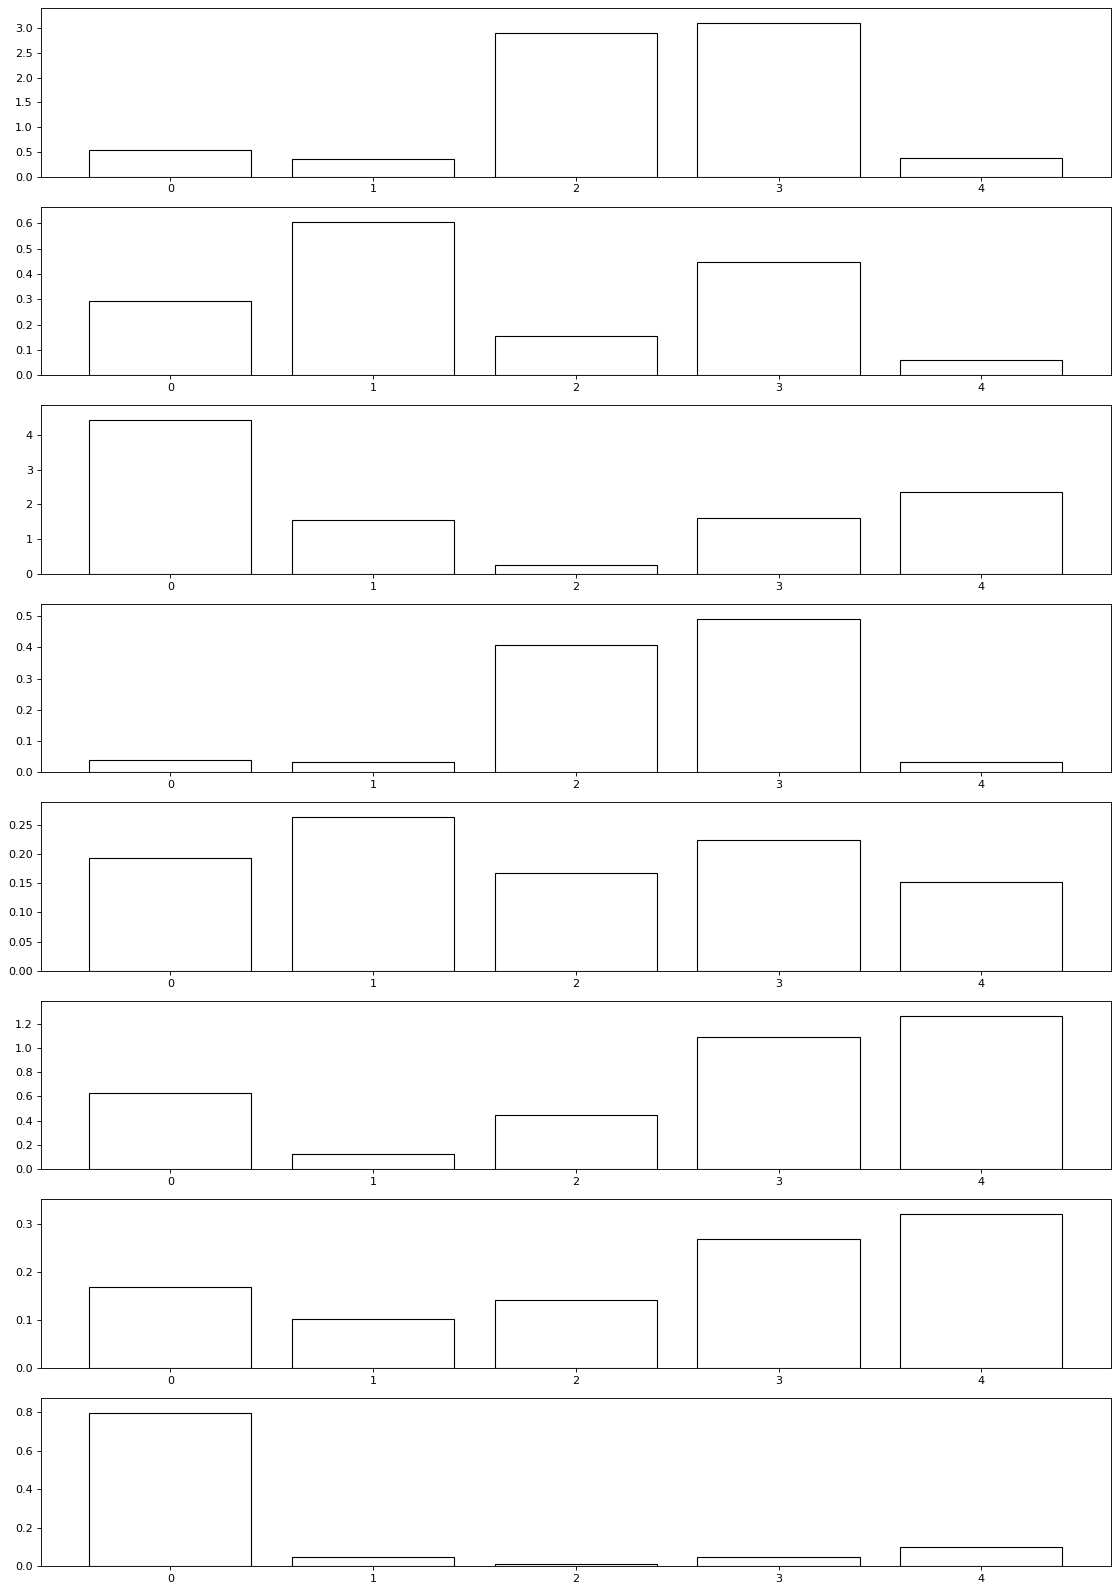

bei den zwei letzten und bei 4. und 5., weil Summe = 1